# EE5175 Lab 4 : Space-invariant Blurring
### Author : Niyas Mon P
### Roll No: EE20B094


#### Input : Mandrill.png
#### Task  : Perform a 2D convolution with a gaussian filter given a $\sigma$.
#### Output : Blured image

In [38]:
#  Before running the code blocks, please ensure all the images are uploaded

In [39]:
# importing necessary libraries
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

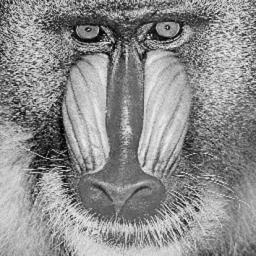

In [40]:
# reading the images
img = cv2.imread('Mandrill.png')
# displaying the image
cv2_imshow(img)

In [41]:
# convert image from 3 channel to 1 channel image. cause, it is in gray scale
img = img[:,:,0]

## Gaussian filter
* We are assuming the Point Spread Function(PSF) is Gaussian
* The spread is determined by the value of $\sigma$.
\begin{align*}
h(n,m) = \frac{1}{2\pi\sigma^2} e ^{-\frac{(n^2 + m^2 )}{2 \sigma^2}}
\end{align*}
* Ideally the Gaussian PSF spreads to infinity. But due to limitation we are trunking the spread function to $\pm3\sigma$ from the centre where $99\%$ of gaussian spread exists. Hence our kernel size is odd number nearest to $⌈6\sigma + 1 ⌉$. Odd number is taken inorder have a well defined centre.
* Since the PSF exists for finite region, we are normalizing the values of the kernel so that the kernel values add up to 1.

In [42]:
# gaussian filter
def gaussian_filter(sigma):

  # if sigma is zero, kernel size is 1 with value 1
  if sigma == 0:
    return np.ones((1,1))

  # kernel size is odd number equal to or next nearest to (6*sigma +1)
  size            = int(np.ceil(6*sigma + 1))
  size            = size if (size % 2 == 1) else size + 1
  # initializing a blank kernel
  kernel          = np.zeros((size,size))

  # updating the kernel with gaussian values where (0,0) being at the centre
  for n in range(size):
    for m in range(size):
      i           = n - size//2
      j           = m - size//2
      kernel[n,m] = np.exp(-(i**2 + j**2)/(2*sigma**2))

  # normalizing the kernel so that sum = 1
  sum             = np.sum(kernel,axis=None)
  kernel          = (kernel / sum )

  return kernel

### Zero padding
* Zero padding is needed around the image inorder to perform the 2D convolution operation. And number of pixels padded on one side will be '$n$' if kernel size is '$2n+1$'.
* The padding is done inorder to make sure that when convolution of peripheral pixels are done with kernel, the the kernel values sitting outside the image are getting multiplied with zero.

In [43]:
# return a zero padded image required for convolution
def pad(image,kernel):

  kernel_size = kernel.shape[0]
  # no of zero padding on one side will be 'n' if kernel size is '2n+1'
  pad_size    = kernel_size//2
  # dimensions of original image
  ht, wd      = image.shape

  # if the kernel size is 1, the no need for padding
  if kernel_size == 1:
    return image

  # zero padding
  padded_image = np.zeros((ht+ 2*pad_size,wd+ 2*pad_size))
  padded_image[pad_size:-pad_size,pad_size:-pad_size] = image

  return padded_image

## 2D convolution
#### Following function takes the image and the kernel as the inputs and outputs the convolved image.

In [44]:
# 2D convolution with kernel
def blur(image,kernel):

  # abstracting image size and kernel size
  img_ht , img_wd = image.shape
  kernel_size     = kernel.shape[0]

  # if kernel size is 1, then output will be the image multiplied by the kernel value
  if kernel_size == 1:
    return image * kernel[0,0]

  # zero padding
  padded_image    = pad(image,kernel)
  # creating a blank image for output
  blured_image    = np.zeros_like(image)

  for n in range(img_ht):
    for m in range(img_wd):
      # 2D convolution with kernal
      conv2d_val        = np.sum(padded_image[n:n+kernel_size,m:m+kernel_size] * kernel, axis=None)
      blured_image[n,m] = conv2d_val

  return blured_image


### Plot of guassian kernels and output images
#### Both Kernel and Blured output images are plotted for the $\sigma$ values of $0.0, 0.3, 0.6, 1.0, 1.2$ and $1.6$.

Gaussian kernel plots:


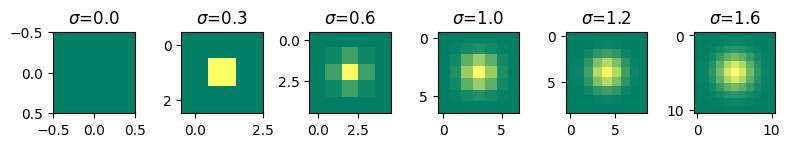


Output of convolution:


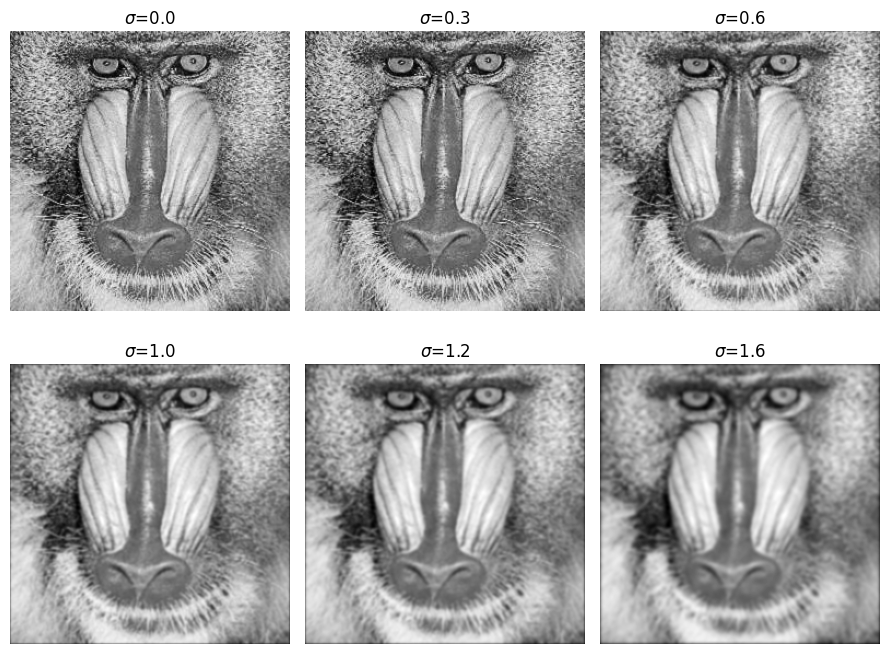

In [45]:
# testing with different sigma values
sigma = [0.0, 0.3, 0.6,1.0, 1.2, 1.6]

# ploting the gaussian kernels
print("Gaussian kernel plots:")
plt.figure(figsize=(8,15))
for i in range(len(sigma)):
 plt.subplot(1,6,i+1)

 plt.title(f'$\sigma$={sigma[i]}')
 plt.imshow(gaussian_filter(sigma[i]),cmap='summer')

plt.tight_layout()
plt.show()

# ploting the output images
print("\nOutput of convolution:")
plt.figure(figsize=(9,7))
for i in range(len(sigma)):
 plt.subplot(2,3,i+1)

 kernel       = gaussian_filter(sigma[i])
 blured_image = blur(img,kernel)

 plt.title(f'$\sigma$={sigma[i]}')
 plt.imshow(blured_image,cmap='gray')
 plt.axis('off')

plt.tight_layout()
plt.show()

## Inferences

* More the $\sigma$, more the spread of a single pixel in the output and more bluring.
* No bluring when $\sigma = 0$.
* Sharp edges are removed by bluring (image becomes smoother).
* Zero padding is required in the original image inorder to perform convolution of the pixels at the periphery of the image.
* Since the gaussian kernel size is finite, we need to normalize it such that kernel values add up to 1.
* We could do convolution only because it is a **space-invariant blur**.